In [84]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split, search
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns
import spacy

nlp = spacy.load('en', disable=['parser', 'ner'])

In [87]:
def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    s=sub(r'@\w+','', s) #delete user references
    s=sub(r'#','', s) #delete hashtag symbol only, not the hashtag itself
    s=sub(r'https\S+','',s) #delete the url
    s=sub(r'RT','',s) #delete the RT
    s=sub(r'\n','',s) #delete the end of line indicators
    s=sub(r'[^\w\s]','',s) #delete all punctuation signs, needed??? Maybe we could remove only the : at the beginning of each tweet
    s=s.encode('ascii', 'ignore').decode('ascii') #delete all the emojis
    doc = nlp(s)
    s=" ".join([token.lemma_ for token in doc]) #lemmatizing using spacy

    return s

In [3]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [88]:
X.map(clean_twitter)

0          Heres CNN on Sharia law -PRON- can be stone or have -PRON- hand cut off b...
1          LOOK obama Clinton crony ILLEGALLY arm amp train muslim terrorist include...
2          ThrowbackThursday BenGarrison cartoon from 2013 Obama get crown War Debt ...
3                                  Say Islam be peace or else   trump maga isis tcot   
4                                                 all aboard the Trump Train ChooChoo  
5               FLASHBACK gtgt Judicial Watch Releases Huma Abedin Deposition testimony
6          Following FBI presser   say the system be rig   amp   weigh in FoxLDT 7 p.m.
7                                                   Trump be run Against a Rigged Press
8          literally 98 of Hillary supporter -PRON- see online be astroturfe spammer...
9                                                                               Islam  
10         PSYCHO   MOTHERHillary at -PRON- most EVILMAGA   basketofdeplorable Never...
11         the unthinkable have 

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

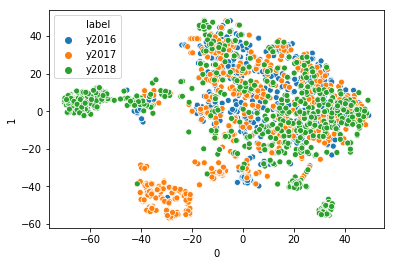

In [89]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

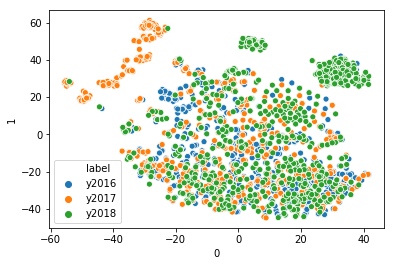

In [90]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

/home/oscarmartinez/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['PRON', 'make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


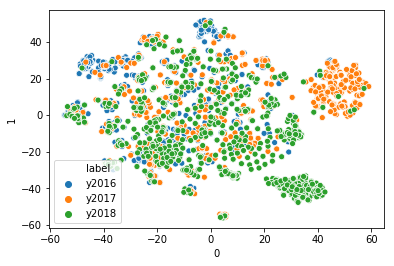

In [91]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
vectorizer2 = TfidfVectorizer(lowercase=True, preprocessor = clean_twitter,stop_words='english') #caution with the default english stopping words!!
V = vectorizer2.fit_transform(X)
ax, d = plot_embedding(V, y)